# Multiple Linear Regression: (ISLR::Advertising)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# url='http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv'
url='https://github.com/prasertcbs/basic-dataset/raw/master/ISLR/Advertising.csv'
# df=pd.read_csv(url, index_col=0)
df=pd.read_csv(url, usecols=[1, 2, 3, 4])
# df=pd.read_csv(url, usecols=list(range(1, 5)))
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


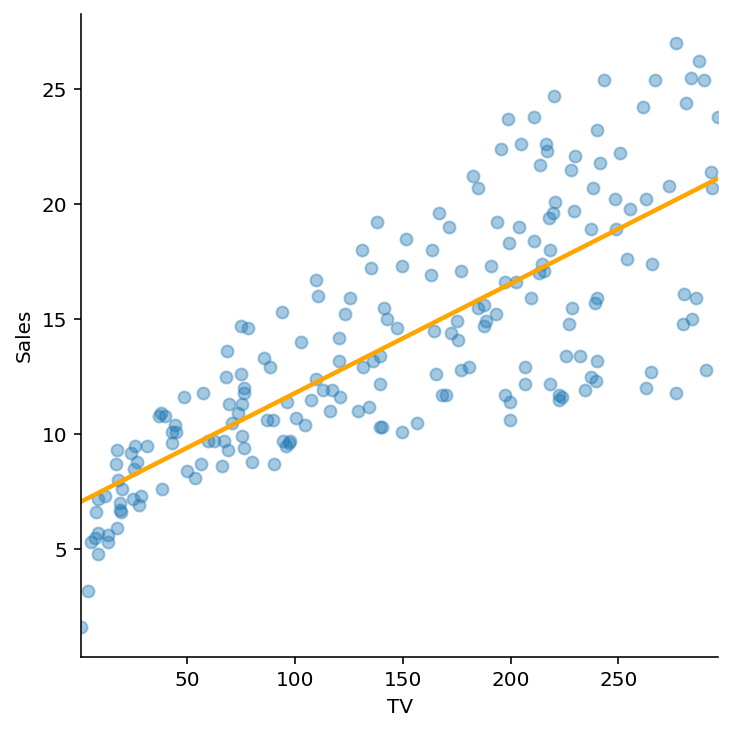

In [4]:
sns.lmplot(x='TV', y='Sales', data=df, ci=None, 
           scatter_kws={'alpha': 0.4}, 
           line_kws={'color': 'orange'})

## sklearn: LinearRegression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
model = LinearRegression()
model

LinearRegression()

In [9]:
X=df.drop(columns=['Sales'])
y=df['Sales']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
model.score(X_test, y_test) # R-squared

0.9158571237942507

In [14]:
model.intercept_

2.950610829800855

In [15]:
model.coef_

array([0.04605712, 0.18205699, 0.00217386])

In [17]:
model.predict([[200, 40, 70]])

array([19.59648533])

In [16]:
model.predict([[200, 40, 70], 
               [100, 80, 50],
               [ 40, 20, 10]])

array([19.59648533, 22.22957545,  8.45577418])

In [18]:
y_hat=model.predict(X_test)
y_hat

array([18.04574482, 15.73861826, 16.84356346, 15.35685473, 12.89605791,
       23.16879776,  8.88479469, 11.82012376, 21.59529623, 12.41693419,
       24.18117324, 15.46219275, 10.30564063, 24.69728247,  6.80550796,
       20.74928838, 14.43804204, 12.70152362,  4.61266743, 17.21713841,
       17.28628047,  3.68243276, 16.40574316, 15.179972  ,  6.64719376,
       15.22507183, 12.79241628, 12.28609761, 15.14754323, 10.58022814,
       10.23477794, 15.78640116,  6.06563696, 16.59917034, 13.37090764,
        8.4071823 , 17.98836776,  7.54963159,  3.73119563, 13.8517423 ,
       14.96599967, 20.68573373, 19.56246184, 18.91505159, 11.40216269,
       16.82174355, 17.09905926, 19.93345072,  9.69090733, 12.06354719,
       21.77143369, 16.85331015, 13.52251788, 17.87759026,  6.16922946,
       16.8690906 ,  4.55792099,  8.9619058 ,  9.74529212, 23.22822252])

## Statsmodels: Multiple Linear regression

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [22]:
# formula: response ~ predictor1 + predictor2
model_a = smf.ols(formula='Sales ~ TV + Radio', data=df).fit()
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 31 Dec 2020   Prob (F-statistic):           4.83e-98
Time:                        15:11:01   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [23]:
model_b = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df).fit()
print(model_b.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 31 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        15:11:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [32]:
model_a.params # coef

Intercept    3.045142
TV           0.047049
Radio        0.179683
Newspaper   -0.003006
dtype: float64

In [33]:
model_a.pvalues

Intercept    1.608608e-12
TV           1.091697e-57
Radio        1.161068e-34
Newspaper    6.689820e-01
dtype: float64

In [24]:
ya_hat=model_a.predict(X_test)

In [25]:
ya_hat.head()

59     18.107469
25     15.608021
64     16.965709
146    15.279189
115    12.937084
dtype: float64